In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('electricity1.csv')

C:\Users\SAKSHI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,9,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01-11-2011 00:00,None,0.0,1.0,44.0,1.0,11.0,2011.0,0.0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.60,54.32
1,01-11-2011 00:30,None,0.0,1.0,44.0,1.0,11.0,2011.0,1.0,321.8,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,01-11-2011 01:00,None,0.0,1.0,44.0,1.0,11.0,2011.0,2.0,328.57,3060.71,49.10,5,11.1,589.97,311,2834.00,54.23
3,01-11-2011 01:30,None,0.0,1.0,44.0,1.0,11.0,2011.0,3.0,335.6,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,01-11-2011 02:00,None,0.0,1.0,44.0,1.0,11.0,2011.0,4.0,342.9,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                20494 non-null  object 
 1   Holiday                 20494 non-null  object 
 2   HolidayFlag             20494 non-null  float64
 3   DayOfWeek               20494 non-null  float64
 4   WeekOfYear              20494 non-null  float64
 5   Day                     20494 non-null  float64
 6   Month                   20494 non-null  float64
 7   Year                    20494 non-null  float64
 8   PeriodOfDay             20494 non-null  float64
 9   ForecastWindProduction  20494 non-null  object 
 10  SystemLoadEA            20494 non-null  float64
 11  SMPEA                   20494 non-null  float64
 12  ORKTemperature          20494 non-null  object 
 13  ORKWindspeed            20494 non-null  object 
 14  CO2Intensity            20494 non-null

In [5]:
df["ForecastWindProduction"] = pd.to_numeric(df["ForecastWindProduction"], errors= 'coerce')
df["SystemLoadEA"] = pd.to_numeric(df["SystemLoadEA"], errors= 'coerce')
df["SMPEA"] = pd.to_numeric(df["SMPEA"], errors= 'coerce')
df["ORKTemperature"] = pd.to_numeric(df["ORKTemperature"], errors= 'coerce')
df["ORKWindspeed"] = pd.to_numeric(df["ORKWindspeed"], errors= 'coerce')
df["CO2Intensity"] = pd.to_numeric(df["CO2Intensity"], errors= 'coerce')
df["ActualWindProduction"] = pd.to_numeric(df["ActualWindProduction"], errors= 'coerce')
df["SystemLoadEP2"] = pd.to_numeric(df["SystemLoadEP2"], errors= 'coerce')
df["SMPEP2"] = pd.to_numeric(df["SMPEP2"], errors= 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                20494 non-null  object 
 1   Holiday                 20494 non-null  object 
 2   HolidayFlag             20494 non-null  float64
 3   DayOfWeek               20494 non-null  float64
 4   WeekOfYear              20494 non-null  float64
 5   Day                     20494 non-null  float64
 6   Month                   20494 non-null  float64
 7   Year                    20494 non-null  float64
 8   PeriodOfDay             20494 non-null  float64
 9   ForecastWindProduction  20493 non-null  float64
 10  SystemLoadEA            20494 non-null  float64
 11  SMPEA                   20494 non-null  float64
 12  ORKTemperature          20271 non-null  float64
 13  ORKWindspeed            20271 non-null  float64
 14  CO2Intensity            20490 non-null

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

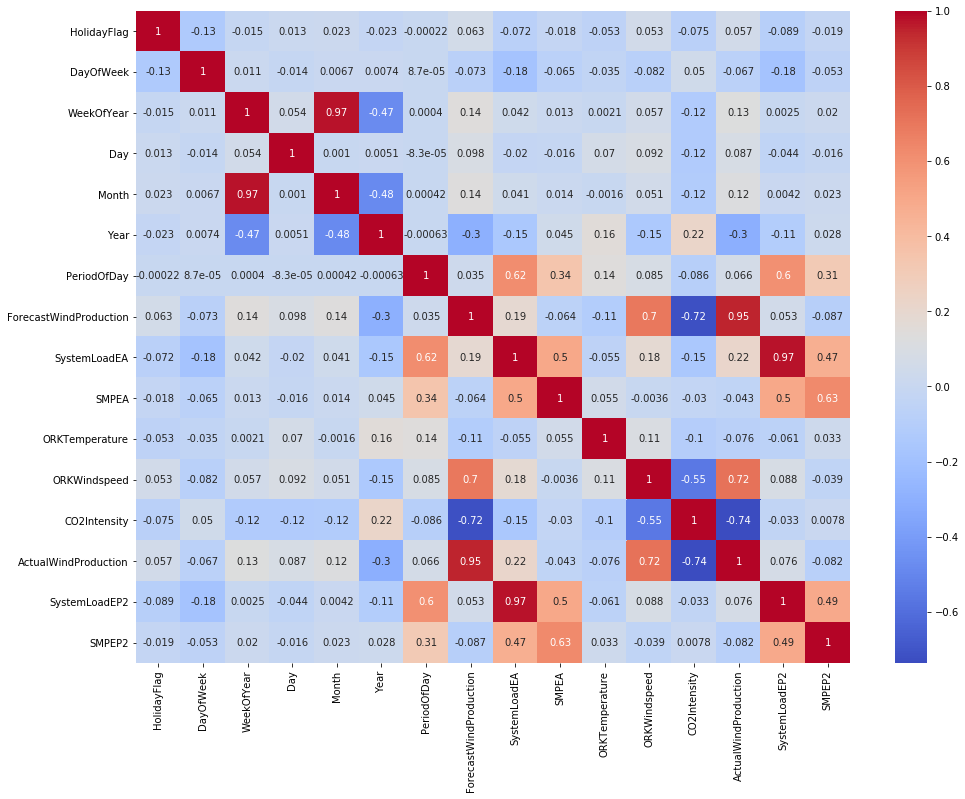

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [10]:
df.corr()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
HolidayFlag,1.000000,-0.129543,-0.014648,0.013115,0.022834,-0.023108,-0.000218,0.063010,-0.072270,-0.017786,-0.053498,0.052985,-0.075483,0.056517,-0.089369,-0.018508
DayOfWeek,-0.129543,1.000000,0.010989,-0.013712,0.006664,0.007420,0.000087,-0.073313,-0.182769,-0.064873,-0.035063,-0.082128,0.049804,-0.066954,-0.184233,-0.052544
WeekOfYear,-0.014648,0.010989,1.000000,0.054114,0.973671,-0.473003,0.000404,0.143849,0.042392,0.012731,0.002143,0.057255,-0.122074,0.130633,0.002467,0.020380
Day,0.013115,-0.013712,0.054114,1.000000,0.001002,0.005078,-0.000083,0.097509,-0.019975,-0.015550,0.069815,0.091572,-0.124190,0.087352,-0.044426,-0.015981
Month,0.022834,0.006664,0.973671,0.001002,1.000000,-0.478905,0.000415,0.136488,0.040684,0.014494,-0.001577,0.051453,-0.116981,0.120443,0.004173,0.022881
Year,-0.023108,0.007420,-0.473003,0.005078,-0.478905,1.000000,-0.000629,-0.300195,-0.151166,0.045203,0.155327,-0.145107,0.221870,-0.304642,-0.111161,0.028059
PeriodOfDay,-0.000218,0.000087,0.000404,-0.000083,0.000415,-0.000629,1.000000,0.034568,0.619824,0.344012,0.140051,0.085234,-0.085802,0.066003,0.602416,0.314698
ForecastWindProduction,0.063010,-0.073313,0.143849,0.097509,0.136488,-0.300195,0.034568,1.000000,0.190138,-0.063930,-0.110842,0.699914,-0.717978,0.946165,0.052535,-0.086646
SystemLoadEA,-0.072270,-0.182769,0.042392,-0.019975,0.040684,-0.151166,0.619824,0.190138,1.000000,0.501489,-0.055257,0.180394,-0.152817,0.218178,0.974225,0.469977
SMPEA,-0.017786,-0.064873,0.012731,-0.015550,0.014494,0.045203,0.344012,-0.063930,0.501489,1.000000,0.054877,-0.003639,-0.030020,-0.042920,0.504721,0.631380


In [11]:
final_dataset=df[["HolidayFlag", "Month","PeriodOfDay", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "CO2Intensity","ActualWindProduction", "SystemLoadEP2","SMPEP2"]]

In [12]:
final_dataset.head()

,HolidayFlag,Month,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0.0,11.0,0.0,315.31,3388.77,49.26,6.0,600.71,356.0,3159.60,54.32
1,0.0,11.0,1.0,321.80,3196.66,49.26,6.0,605.42,317.0,2973.01,54.23
2,0.0,11.0,2.0,328.57,3060.71,49.10,5.0,589.97,311.0,2834.00,54.23
3,0.0,11.0,3.0,335.60,2945.56,48.04,6.0,585.94,313.0,2725.99,53.47
4,0.0,11.0,4.0,342.90,2849.34,33.75,6.0,571.52,346.0,2655.64,39.87


In [13]:
x=final_dataset[["HolidayFlag", "Month","PeriodOfDay", "SystemLoadEA","SMPEA", "ORKTemperature", "CO2Intensity","ActualWindProduction", "SystemLoadEP2"]]

In [14]:
y=final_dataset["SMPEP2"]

In [15]:
x.head()

,HolidayFlag,Month,PeriodOfDay,SystemLoadEA,SMPEA,ORKTemperature,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,0.0,11.0,0.0,3388.77,49.26,6.0,600.71,356.0,3159.60
1,0.0,11.0,1.0,3196.66,49.26,6.0,605.42,317.0,2973.01
2,0.0,11.0,2.0,3060.71,49.10,5.0,589.97,311.0,2834.00
3,0.0,11.0,3.0,2945.56,48.04,6.0,585.94,313.0,2725.99
4,0.0,11.0,4.0,2849.34,33.75,6.0,571.52,346.0,2655.64


In [16]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [17]:
print(model.feature_importances_)

[0.00572074 0.0626588  0.11827483 0.14533242 0.27964049 0.06599646
 0.0619035  0.07430407 0.18616868]


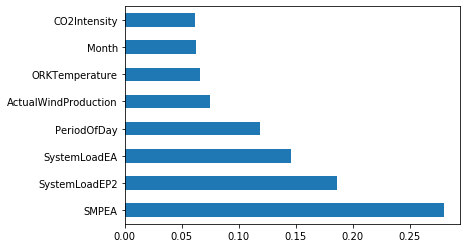

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
regressor=RandomForestRegressor()

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [25]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [27]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42,n_jobs=1)

In [28]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  36.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   36.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  38.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  37.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  34.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  36.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  54.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 42.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [29]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [31]:
rf_random.best_score_

-511.8322216362438

In [32]:
predictions=rf_random.predict(X_test)

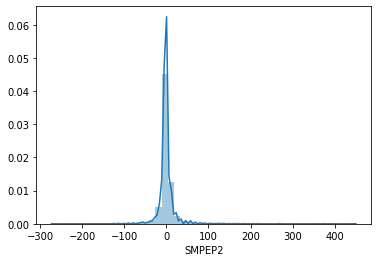

In [33]:
sns.distplot(y_test-predictions)

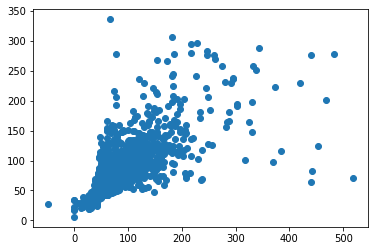

In [34]:
plt.scatter(y_test,predictions)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9.608641292161794
MSE: 478.408199939123
RMSE: 21.872544432212795


In [38]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)